This Notebook allows for the data analysis of experiment 2 in the second year progression report, where we analyse the run-time behaviour of ASTROMoRF against ASTROMoRF with refinements.

In [132]:
#Import relevant libraries 
import pandas as pd 
import numpy as np 
import os 
import matplotlib.pyplot as plt

FOLDER_PATH = '/Users/benjaminrees/Desktop/experiments/Progress_review_exp_2_data'

In [133]:
#Load in Csv Files to pandas dataframes 
csv_files = [f for f in os.listdir(FOLDER_PATH) if f.endswith('.csv')]

# Load each CSV file as a DataFrame and store them in a list
# Load CSVs into a dictionary with filenames (without .csv) as keys
dataframes = {
    os.path.splitext(file)[0]: pd.read_csv(os.path.join(FOLDER_PATH, file), index_col='Iteration')
    for file in csv_files
}

# Optional: print the keys to confirm
print(f"Loaded DataFrames: {list(dataframes.keys())}")
[print(a.head()) for a in dataframes.values()]

# Optional: print the number of files loaded
print(f"Loaded {len(dataframes)} CSV files.")


Loaded DataFrames: ['ASTROMORF_REFINED-macroreplication_4', 'ASTROMORF_REFINED-macroreplication_5', 'ASTROMORF_REFINED-macroreplication_2', 'ASTROMORF_REFINED-macroreplication_3', 'ASTROMORF_REFINED-macroreplication_1', 'ASTROMORF-macroreplication_4', 'ASTROMORF-macroreplication_5', 'ASTROMORF-macroreplication_2', 'ASTROMORF-macroreplication_3', 'ASTROMORF-macroreplication_1']
           Runtime (s)  Gauss-Newton Iterations
Iteration                                      
1             0.144322                        1
2             0.237458                        1
3             0.232645                        1
4             0.278655                       40
5             0.268763                       40
           Runtime (s)  Gauss-Newton Iterations
Iteration                                      
1             0.148005                        1
2             0.237799                        1
3             0.232781                        1
4             0.253012                      

In [134]:
#Split the list of dataframes into two lists one for each solver 
ASTROMoRF_dataframes = dict() 
ASTROMoRFREFINED_dataframes = dict() 

for key, df in dataframes.items():
    if 'ASTROMORF_REFINED' in key:
        ASTROMoRFREFINED_dataframes[key] = df
    elif 'ASTROMORF' in key:
        ASTROMoRF_dataframes[key] = df

# Optional: print the keys to confirm
print(f"Loaded ASTROMoRF DataFrames: {list(ASTROMoRF_dataframes.keys())}")
print(f"Loaded ASTROMoRFREFINED DataFrames: {list(ASTROMoRFREFINED_dataframes.keys())}")

ASTROMoRF_list = list(ASTROMoRF_dataframes.values())
ASTROMoRFREFINED_list = list(ASTROMoRFREFINED_dataframes.values())

Loaded ASTROMoRF DataFrames: ['ASTROMORF-macroreplication_4', 'ASTROMORF-macroreplication_5', 'ASTROMORF-macroreplication_2', 'ASTROMORF-macroreplication_3', 'ASTROMORF-macroreplication_1']
Loaded ASTROMoRFREFINED DataFrames: ['ASTROMORF_REFINED-macroreplication_4', 'ASTROMORF_REFINED-macroreplication_5', 'ASTROMORF_REFINED-macroreplication_2', 'ASTROMORF_REFINED-macroreplication_3', 'ASTROMORF_REFINED-macroreplication_1']


In [135]:
#Build two dataframes for each ASTROMoRF variant of mean times per iteration and mean iterations of GN solver per iteration over all the macroreplications

print(ASTROMoRF_list[0].columns)

combined_ASTROMoRF = pd.concat(ASTROMoRF_list, axis=1, keys=range(len(ASTROMoRF_list)))

# Compute mean across the top-level columns for each metric
ASTROMoRF_mean_df = pd.DataFrame({
    'mean_runtime': combined_ASTROMoRF.xs('Runtime (s)', axis=1, level=1).mean(axis=1),
    'mean_Gauss_Newton_iterations': combined_ASTROMoRF.xs('Gauss-Newton Iterations', axis=1, level=1).mean(axis=1)
})

print(ASTROMoRF_mean_df.head())

combined_ASTROMoRFREFINED = pd.concat(ASTROMoRFREFINED_list, axis=1, keys=range(len(ASTROMoRFREFINED_list)))

# Compute mean across the top-level columns for each metric
ASTROMoRFREFINED_mean_df = pd.DataFrame({
    'mean_runtime': combined_ASTROMoRFREFINED.xs('Runtime (s)', axis=1, level=1).mean(axis=1),
    'mean_Gauss_Newton_iterations': combined_ASTROMoRFREFINED.xs('Gauss-Newton Iterations', axis=1, level=1).mean(axis=1)
})

print(ASTROMoRFREFINED_mean_df.head())

Index(['Runtime (s)', 'Gauss-Newton Iterations'], dtype='object')
           mean_runtime  mean_Gauss_Newton_iterations
Iteration                                            
1              0.025976                           1.0
2              0.025880                           1.0
3              0.020264                           1.0
4              0.023781                           1.0
5              0.023133                           2.0
           mean_runtime  mean_Gauss_Newton_iterations
Iteration                                            
1              0.126761                           8.8
2              0.194433                          16.6
3              0.186773                           8.8
4              0.203614                           8.8
5              0.207093                          24.4


In [136]:
#Find the mean summary statistic in each dataframe of ASTROMoRF variants that records the mean times per iteration and mean iterations of GN solver per iteration over all 
# the macroreplications
overall_mean_runtime = ASTROMoRF_mean_df['mean_runtime'].mean()
overall_mean_gn_iterations = ASTROMoRF_mean_df['mean_Gauss_Newton_iterations'].mean()

print(f"Overall mean runtime of ASTROMoRF: {overall_mean_runtime:.4f}")
print(f"Overall mean Gauss-Newton iterations of ASTROMoRF: {overall_mean_gn_iterations:.4f}")
print(f'Total runtime of ASTROMoRF during Model Construction: {sum(ASTROMoRF_mean_df['mean_runtime'].tolist()):.4f}')

print('\n')

overall_mean_runtime = ASTROMoRFREFINED_mean_df['mean_runtime'].mean()
overall_mean_gn_iterations = ASTROMoRFREFINED_mean_df['mean_Gauss_Newton_iterations'].mean()

print(f"Overall mean runtime of Refined ASTROMoRF: {overall_mean_runtime:.4f}")
print(f"Overall mean Gauss-Newton iterations of Refined ASTROMoRF: {overall_mean_gn_iterations:.4f}")
print(f'Total runtime of Refinde ASTROMoRF during Model Construction: {sum(ASTROMoRFREFINED_mean_df['mean_runtime'].tolist()):.4f}')



Overall mean runtime of ASTROMoRF: 0.0421
Overall mean Gauss-Newton iterations of ASTROMoRF: 36.1006
Total runtime of ASTROMoRF during Model Construction: 7.5385


Overall mean runtime of Refined ASTROMoRF: 0.2821
Overall mean Gauss-Newton iterations of Refined ASTROMoRF: 27.7411
Total runtime of Refinde ASTROMoRF during Model Construction: 50.7848


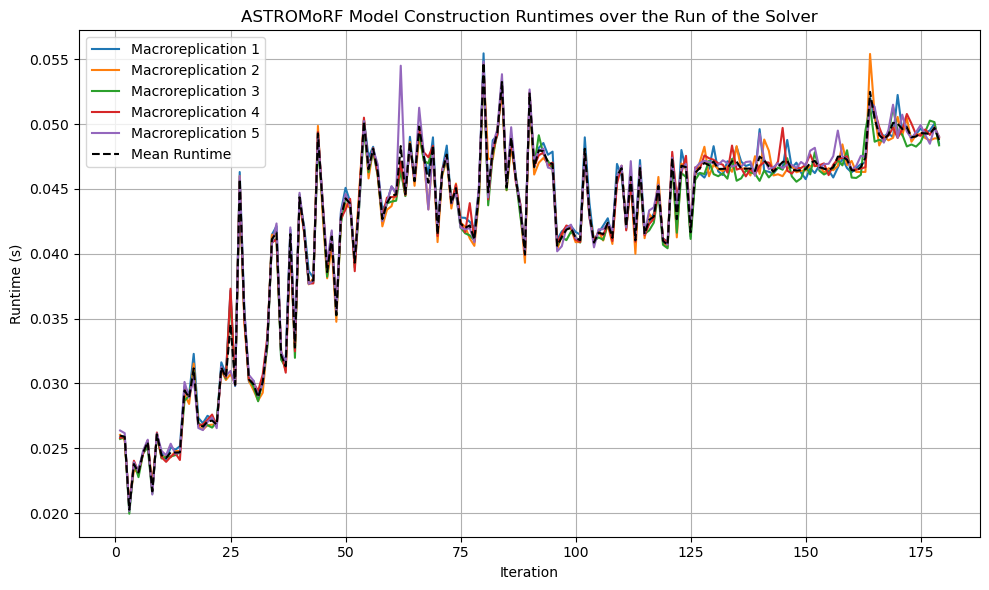

In [137]:
#Plot the runtimes of each solver in ASTROMoRF on a plot

#get the runtimes
ASTROMoRF_runtimes_list = [a['Runtime (s)'].tolist() for a in ASTROMoRF_list]
ASTROMoRF_iterations_list = [a.index.tolist() for a in ASTROMoRF_list]
ASTROMoRF_mean_run = ASTROMoRF_mean_df['mean_runtime'].tolist()

plt.figure(figsize=(10, 6))

i = 1 
for iterations,runtime in zip(ASTROMoRF_iterations_list,ASTROMoRF_runtimes_list):
    plt.plot(iterations, runtime, label=f'Macroreplication {i}')
    i += 1
plt.plot(ASTROMoRF_mean_df.index.tolist(), ASTROMoRF_mean_run, label='Mean Runtime', color='black', linestyle='--')

plt.xlabel('Iteration')
plt.ylabel('Runtime (s)')
plt.title('ASTROMoRF Model Construction Runtimes over the Run of the Solver')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('ASTROMoRF_Runtimes.png')
plt.show()

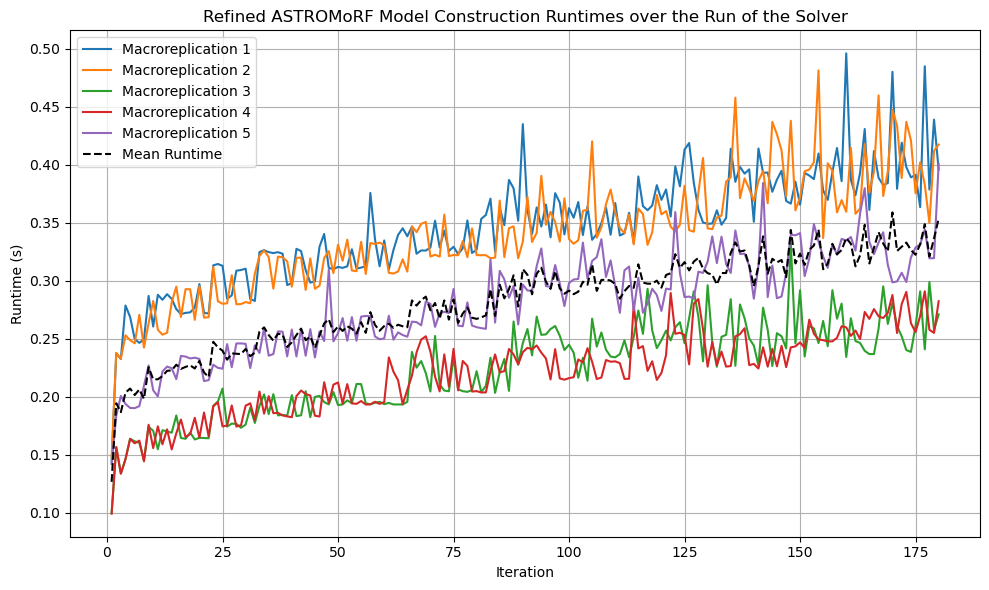

In [138]:
#Plot the runtimes of each solver in ASTROMoRF Refined on a plot

#get the runtimes
ASTROMoRF_runtimes_list = [a['Runtime (s)'].tolist() for a in ASTROMoRFREFINED_list]
ASTROMoRF_iterations_list = [a.index.tolist() for a in ASTROMoRFREFINED_list]
ASTROMoRF_mean_run = ASTROMoRFREFINED_mean_df['mean_runtime'].tolist()

plt.figure(figsize=(10, 6))

i = 1 
for iterations,runtime in zip(ASTROMoRF_iterations_list,ASTROMoRF_runtimes_list):
    plt.plot(iterations, runtime, label=f'Macroreplication {i}')
    i += 1
plt.plot(ASTROMoRFREFINED_mean_df.index.tolist(), ASTROMoRF_mean_run, label='Mean Runtime', color='black', linestyle='--')

plt.xlabel('Iteration')
plt.ylabel('Runtime (s)')
plt.title('Refined ASTROMoRF Model Construction Runtimes over the Run of the Solver')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('ASTROMoRFREFINED_Runtimes.png')
plt.show()

In [139]:
#Study sensitivity of the run 